# voting能够提高准确度的原因

In [1]:
import numpy as np
n=10000 # 分类器数量
p = np.array([0.51, 0.49])
result = []
for i in range(1000):
    num = np.random.choice([0, 1],size=n, p = p.ravel())
    if len(num[num==0])>len(num[num==1]):
        result.append(0)
    else:
        result.append(1)

result = np.array(result)
print(len(result[result==0])/float(len(result)))

0.975


# 投票表决

LogisticRegression = 0.8897142857142857
DecisionTreeClassifier = 0.996
SVC = 0.9988571428571429
VotingClassifier = 0.9982857142857143


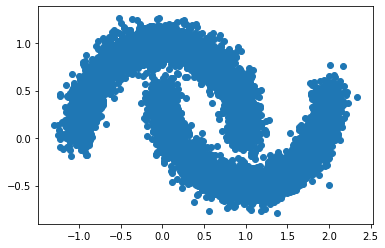

In [5]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 使用Sklearn中moon数据集
X, y = make_moons(n_samples=7000, noise=0.1)
plt.scatter(X[:,0], X[:,1])

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.25, 
                                        random_state=42)

# 定义三个基分类器
# 逻辑回归、决策树、SVM
lr = LogisticRegression()
dt = DecisionTreeClassifier()
# svm = SVC()
# 若为软投票表决需要输出概率，svm需要加probability=True
svm = SVC(probability=True)

# 定义投票分类器
voting = VotingClassifier(
    estimators=[('lr', lr), ('rf', dt), ('svc', svm)],
    # 若为硬投票表决voting为hard
    # 若为软投票表决voting为soft
    voting='hard'
)

# 输出各个分类器的准确率
for clf in (lr, dt, svm, voting):
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print(clf.__class__.__name__, '=', accuracy_score(y_test, y_hat))

# bagging

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

In [4]:
bag_clf = BaggingClassifier(
    SVC(), # 基分类器
    n_estimators=500, # 有多少个基分类器
    # True为有放回抽样，就是bagging
    # False为无放回抽样，相当于pasting
    bootstrap=True,
    max_samples=1.0,
)
bag_clf.fit(X, y)
y_hat = bag_clf.predict(X)
print(bag_clf.__class__.__name__, '=', accuracy_score(y, y_hat))

BaggingClassifier = 0.9733333333333334


In [34]:
# 包外估计
bag_clf = BaggingClassifier(
    SVC(), # 基分类器
    n_estimators=500, # 有多少个基分类器
    # True为有放回抽样，就是bagging
    # False为无放回抽样，相当于pasting
    bootstrap=True,
    max_samples=1.0,
    oob_score=True
)
bag_clf.fit(X, y)
print(bag_clf.oob_score_)
# 每个训练实例的包外决策函数，决策函数返回的是每个实例的类别概率
print(bag_clf.oob_decision_function_)

0.9666666666666667
[[1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.     

# 随机森林：bagging中的基分类器是决策树

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# X, y = load_iris(return_X_y=True)
iris = load_iris()
X = iris.data
y = iris.target

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",
                           max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True
)
bag_clf.fit(X, y)
y_hat = bag_clf.predict(X)
print(bag_clf.__class__.__name__, '=', accuracy_score(y, y_hat))

BaggingClassifier = 1.0


# sklearn中的随机森林API

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(X, y)
y_hat = rnd_clf.predict(X)
print(bag_clf.__class__.__name__, '=', accuracy_score(y, y_hat))

BaggingClassifier = 1.0


# 随机森林的特征重要性

In [36]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris.data, iris.target)
for name, score in zip(iris["feature_names"], 
                       rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09121251336565848
sepal width (cm) 0.023509481759871383
petal length (cm) 0.4412210786450729
petal width (cm) 0.44405692622939735


# AdaBoost代码实现

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

data = np.loadtxt('data/wine.data', delimiter=',')
X = data[:, 1:]
y = data[:, 0:1]

# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),
                                                    train_size=0.8,
                                                    random_state=0)

# 定义弱(基)分类器
# from sklearn.linear_model import LogisticRegression
# rf = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier()

# 定义AdaBoost分类器
model = AdaBoostClassifier(
    base_estimator=rf,
    n_estimators=50,
    learning_rate=0.5
)
model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
print("train accuarcy:",accuracy_score(y_train,y_train_hat))

y_test_hat = model.predict(X_test)
print("test accuarcy:", accuracy_score(y_test, y_test_hat))

train accuarcy: 1.0
test accuarcy: 0.9722222222222222


# GBDT

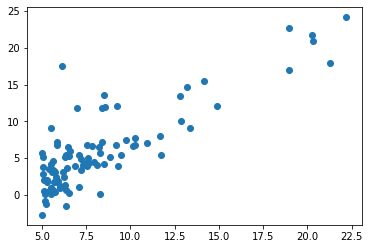

In [37]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/data.txt',delimiter=',')
n = data.shape[1]-1 #特征数
X = data[:,0:n]
y = data[:,-1].reshape(-1,1)

plt.scatter(X,y)

In [38]:
# 根据算法原理手动实现：使用决策树作为基础预测器
# 被称为梯度树提升或梯度提升回归树(GBRT)

# 1.定义第一棵数（最大深度设定为5），并进行训练
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X, y)
# 2.计算残差，并把残差当做目标值训练第二棵树（最大深度设定为5）
y2 = y - tree_reg1.predict(X).reshape(-1, 1)
tree_reg2 = DecisionTreeRegressor(max_depth=5)
tree_reg2.fit(X, y2)
# 3.继续计算残差，并把残差当做目标值训练第三棵树(最大深度设定为5)
y3 = y2 - tree_reg2.predict(X).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(X, y3)
# 4.测试
# 取数据集前5条数据，并对前5条数据做预测
X_new = X[0:5, ]
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
print(y_pred)

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


# 直接使用sklearn提供的GradientBoostingRegressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=5,
                                 n_estimators=3,
                                 learning_rate=1.0)
gbrt.fit(X, y.ravel())
print(gbrt.predict(X_new))

[17.61560196  9.15380196 12.831       4.57199973  6.68971688]


# 使用提前停止法找GBRT树的最佳数量

In [40]:
# 使用staged_predict()方法：在训练的每个阶段都对集成的预测返回一个迭代器
# 以下代码训练了一个拥有120棵树的GBRT集成，然后测量每个训练阶段的验证误差，
# 从而找到树的最优数量，最后使用最优树重新训练了一个GBRT集成
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), 
                                                    train_size=0.8, 
                                                    random_state=0)

gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.]

SyntaxError: invalid syntax (<ipython-input-40-6fcabff304b9>, line 5)

# Stacking代码实现-mlxtend

In [22]:
# sklearn并没有集成stacking，使用前需用如下命令安装 pip install mlxtend
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

data = np.loadtxt('data/wine.data', delimiter=',')
X = data[:, 1:]
y = data[:, 0:1]
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), 
                                                    train_size=0.8, 
                                                    random_state=0)

# 定义基分类器
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# 定义最后用的逻辑回归分类器
lr = LogisticRegression()

# 定义堆叠集成
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3], 
                          meta_classifier=lr, 
                          use_probas=True)

# 对每个模型分别进行评价
for model in [clf1,clf2,clf3,lr,sclf]:
    model.fit(X_train,y_train)
    y_test_hat = model.predict(X_test)
    print(model.__class__.__name__, 
          ',test accuarcy:',
          accuracy_score(y_test,y_test_hat))

KNeighborsClassifier ,test accuarcy: 0.8055555555555556
RandomForestClassifier ,test accuarcy: 1.0
GaussianNB ,test accuarcy: 0.9166666666666666
LogisticRegression ,test accuarcy: 0.9166666666666666
StackingClassifier ,test accuarcy: 0.9722222222222222


/Users/traumlou/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Stacking代码实现 - sklearn

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=42)

estimators1 = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(random_state=1)),
    ('nb', GaussianNB())
]
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10,
                                  random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(estimators=estimators1,
                         final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

# XGBoost代码实现1

sklearn并没有集成xgboost，使用前需用如下命令安装 pip install xgboost 或者 conda install -c conda-forge xgboost 

In [ ]:
import xgboost as xgb